In [228]:
import numpy as np
import matplotlib.pyplot as plt

class BrownianMotion():
    def __init__(self, N_points, T, start_t = 0, start_x = 0, d = 1):
        self.d = d
        self.T = T
        self.start_t = start_t
        self.start_x = start_x
        self.N_points = N_points
        self.dt = (T-start_t)/(N_points-1)
        self.times = np.linspace(start_t, T, N_points)
        self.realisation = None
        self.start_x = start_x
    
    def realise(self):
        if self.d == 1:
            self.realisation = np.concatenate([[0], np.cumsum(2*np.sqrt(self.dt)*np.random.randn(self.N_points-1))])
        else:
            path_array = []
            brownian_vector = [BrownianMotion(self.N_points, self.T, self.start_t, self.start_x, d=1) for i in range(self.d)]
            for dimension in range(self.d):
                brownian_vector[dimension].realise()
                path_array.append(brownian_vector[dimension].realisation)
            self.realisation = np.array(path_array)

class BrownianBees():
    def __init__(self, N_bees, N_points, T):
        self.T = T
        self.N_points = N_points
        self.N_bees = N_bees
        self.bees = [BrownianMotion(N_points, T) for i in range(N_bees)]
        self.paths = [0] * N_bees
        self.grid = np.linspace(0, T, N_points)
        for i, bee in enumerate(self.bees):
            bee.realise()
            self.paths[i] = bee.realisation

        self.stop = False
        self.branching_times = np.random.exponential(1, size=self.N_bees)
        self.event_times = []
    
    def branch(self, bee_index, time):
        if time > self.T:
            return
        N_points_elapsed = np.sum(self.grid<time)
        positions = [self.paths[i][N_points_elapsed] for i in range(self.N_bees)]
        distances = np.abs(positions)
        #print(distances[bee_index])
        if distances[bee_index] != np.max(distances):
            furthest_index = np.argmax(distances)
            self.bees[furthest_index] = BrownianMotion(self.N_points-N_points_elapsed, self.T, start_t = time, start_x = positions[bee_index])
            self.bees[furthest_index].realise()
            self.paths[furthest_index][N_points_elapsed:] = self.bees[furthest_index].realisation
            self.branching_times[furthest_index] = time + np.random.exponential(1)

            self.bees[bee_index] = BrownianMotion(self.N_points-N_points_elapsed, self.T, start_t = time, start_x = positions[bee_index])
            self.bees[bee_index].realise()
            self.paths[bee_index][N_points_elapsed:] = self.bees[bee_index].realisation
            self.branching_times[bee_index] = time + np.random.exponential(1)
        else:
            self.branching_times[bee_index] = time + np.random.exponential(1)

    def get_next_event(self):
        branching_times_idxs = [(i, self.branching_times[i]) for i in range(self.N_bees)]
        branching_times_idxs.sort(key = lambda x:x[1])
        next_idx, next_time = branching_times_idxs[0]
        if next_time > self.T:
            self.stop = True
        return next_idx, next_time
    
    def model(self):
        idx, t = self.get_next_event()
        while not self.stop:
            self.event_times.append(t)
            print(self.paths[0][0], self.paths[1][0])
            print(idx, t)
            self.branch(idx, t)
            idx, t = self.get_next_event()

            



In [229]:
B = np.array([1,3,2])
A = np.sort(B)
print(A, B)

[1 2 3] [1 3 2]


In [230]:
np.sum(np.linspace(0,10,11)<5)

5

1001
0.0 0.0
1 0.5207816957460931
0.0 0.0
1 0.7295449227088104
0.0 0.0
0 1.3210353885174808
0.0 0.0
1 1.5718004204899203
0.0 0.0
1 1.621433629816564
0.0 0.0
0 2.9829814135411814
0.0 0.0
0 4.723470902676798
0.0 0.0
0 5.69012948835284
0.0 0.0
1 6.528004626396072
0.0 0.0
1 8.920755132786958
0.0 0.0
1 9.62910461477653


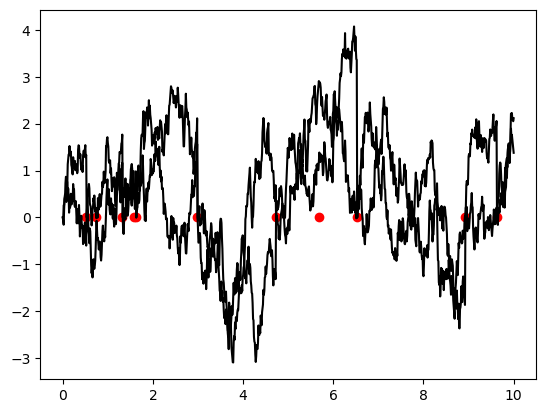

In [211]:
N_bees = 2
N_points = 1001
T = 10

BBees = BrownianBees(N_bees, N_points, T)
print(len(BBees.paths[0]))
BBees.model()

for i, path in enumerate(BBees.paths):
    #print(path)
    plt.plot(np.linspace(0, T, N_points), path, label=f"Bee {i}", color="Black")
    
plt.scatter(BBees.event_times, [0]*len(BBees.event_times), color="red")
